# RECOMMENDER SYSTEM :  Crop and Fertilizers Recommendation System

The **Crop and Fertilizer Recommendation System** is a Python ML project designed to recommend the best crops and fertilizers to farmers based on soil and environmental factors
<br>
By analyzing data on soil nutrients (Nitrogen, Phosphorus, Potassium), temperature, humidity, and rainfall, the system helps optimize agricultural productivity.

The goal is to predict the type of crop to be recommended, which falls into distinct categories or classes.<br>


## Dataset
The dataset for this project is sourced from a comprehensive agricultural study and includes key parameters influencing crop growth.<br> This data will be used to train and validate our crop recommendation model.
## Data fields
**N** - ratio of Nitrogen content in soil <br>
**P** - ratio of Phosphorous content in soil <br>
**K** - ratio of Potassium content in soil<br>
**temperature** - temperature in degree Celsius<br>
**humidity** - relative humidity in %<br> 
**ph** - ph value of the soil<br>
**rainfall** - rainfall in mm<br>
## Libraries Used:
This project utilizes several Python libraries, including `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`, `Sklearn`, and  build machine learning models.
## Notebook Structure:
- **Import Libraries and Load Data**
- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Data Visualization**
- **Model Building**
- **Model Evaluation**
- **Conclusion and Recommendations**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"dataset/Fertilizer.csv")

In [3]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [4]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [5]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [6]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         99 non-null     int64 
 1   Potassium        99 non-null     int64 
 2   Phosphorous      99 non-null     int64 
 3   Fertilizer Name  99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None
        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


<Axes: xlabel='Fertilizer Name', ylabel='count'>

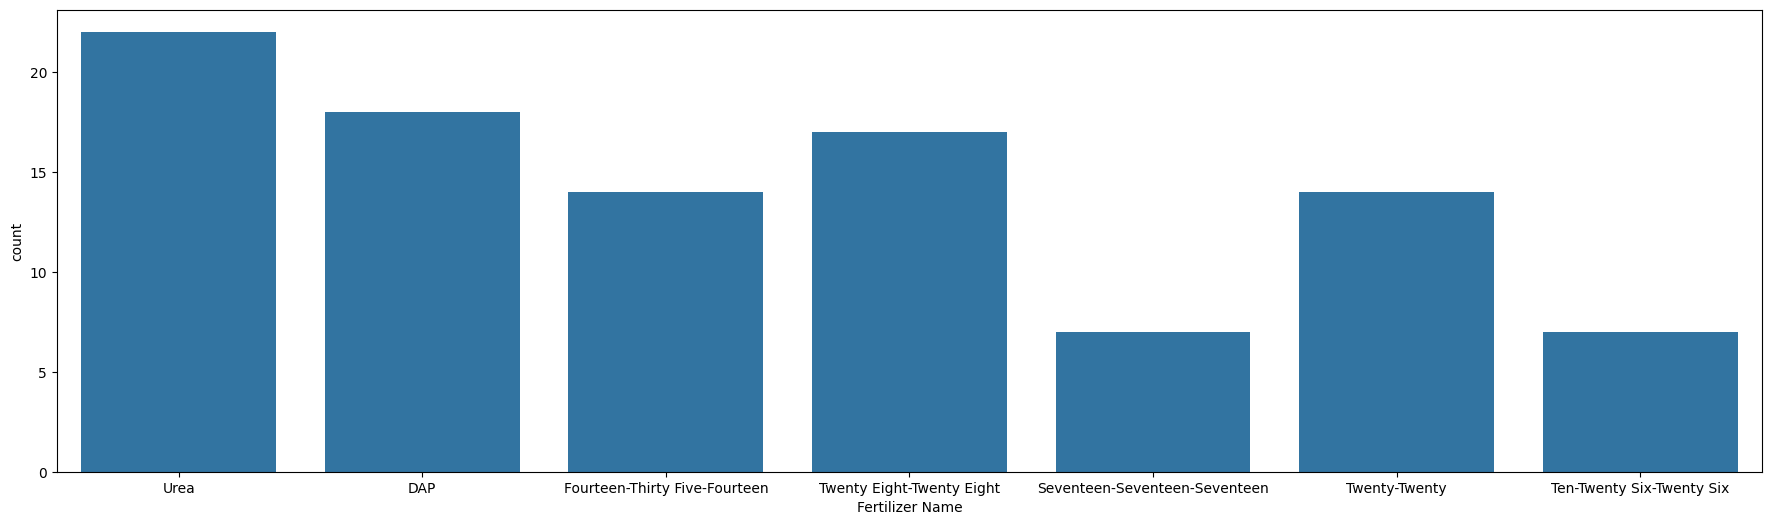

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

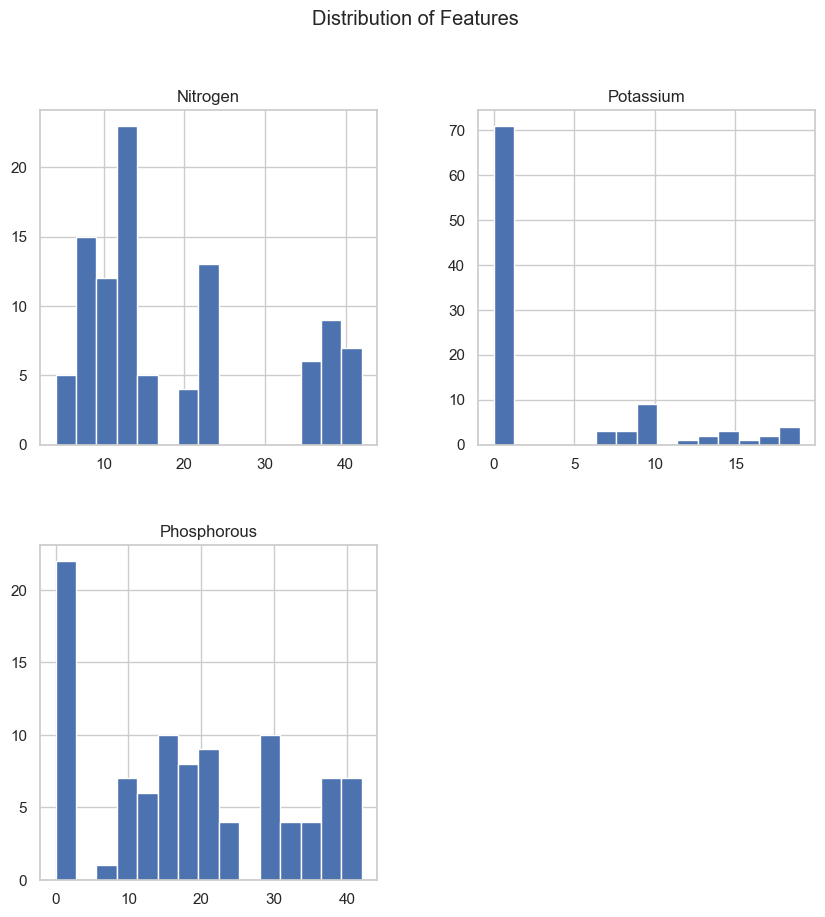

In [8]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(10, 10))
plt.suptitle('Distribution of Features')
plt.show()


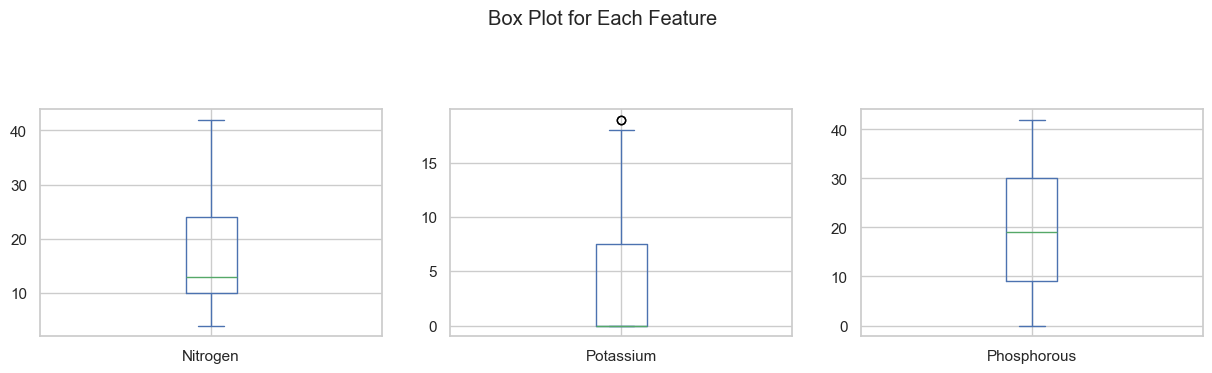

In [9]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()


In [10]:
corr = df.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.500087,-0.686971
Potassium,-0.500087,1.000000,0.089192
Phosphorous,-0.686971,0.089192,1.000000


<Axes: >

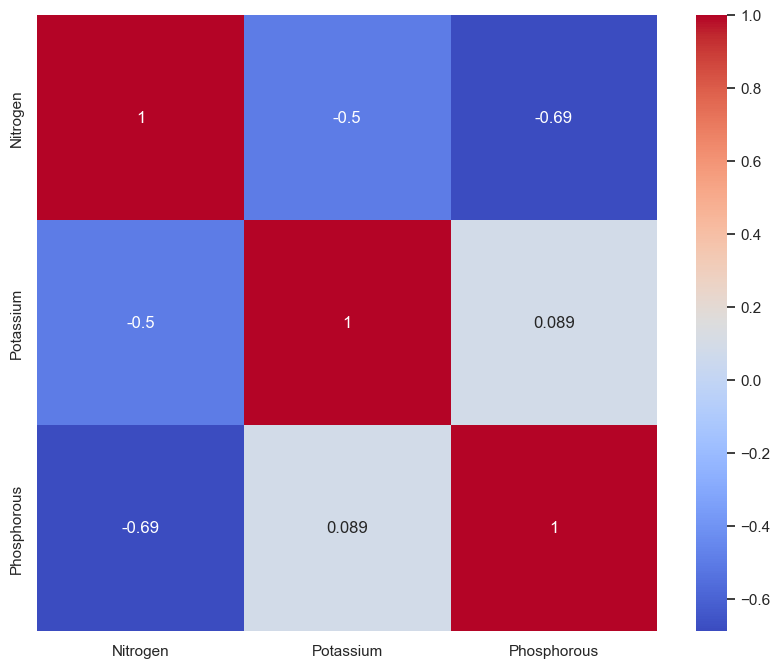

In [11]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

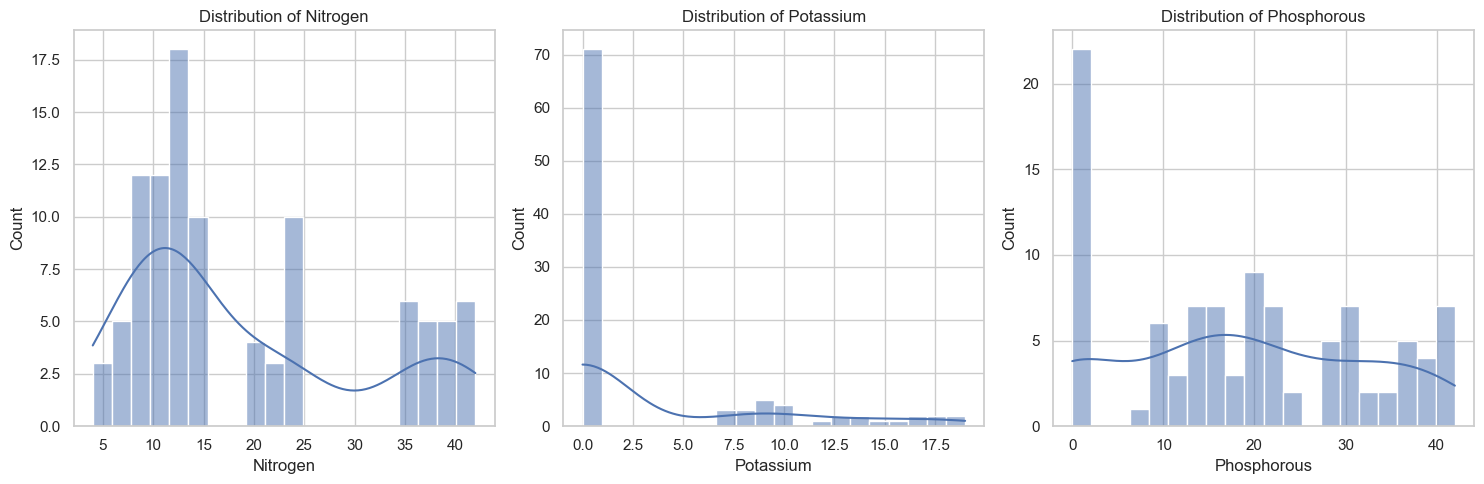

In [12]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

In [13]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [20]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Nitrogen     79 non-null     int64
 1   Potassium    79 non-null     int64
 2   Phosphorous  79 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


In [23]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
pred_rand = rand.predict(x_test)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy_rand = accuracy_score(y_test, pred_rand)
precision_rand = precision_score(y_test, pred_rand, average='weighted')
recall_rand = recall_score(y_test, pred_rand, average='weighted')
f1_rand = f1_score(y_test, pred_rand, average='weighted')

# Print evaluation metrics
print(f"Random Forest Classifier Metrics with GridSearchCV:")
print(f"Accuracy: {accuracy_rand}")
print(f"Precision: {precision_rand}")
print(f"Recall: {recall_rand}")
print(f"F1-score: {f1_rand}")

# Compute the confusion matrix
conf_matrix_rand = confusion_matrix(y_test, pred_rand)

Random Forest Classifier Metrics with GridSearchCV:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


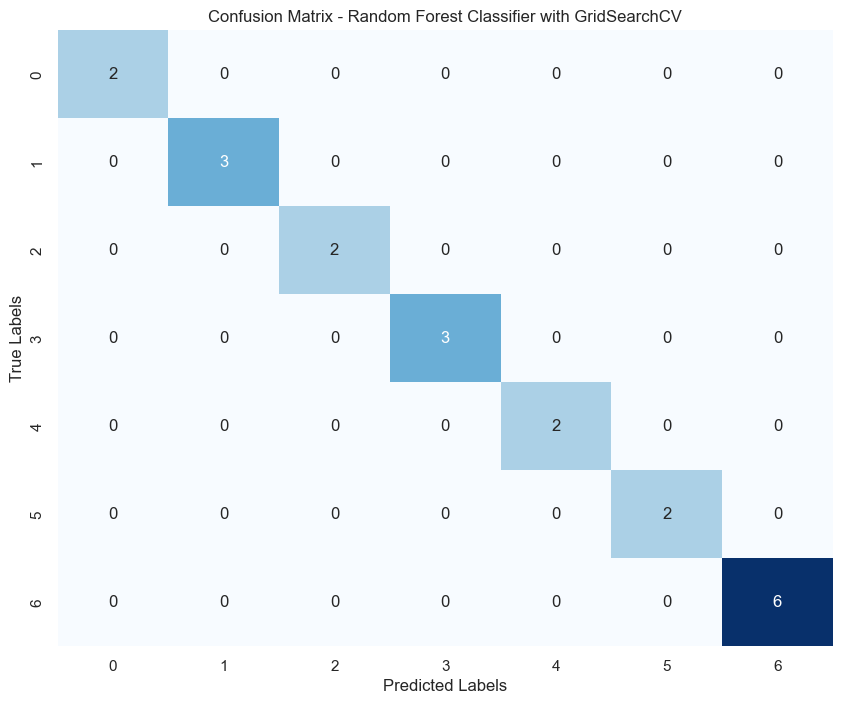

In [33]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rand, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with GridSearchCV')
plt.show()

Neural Network Model Metrics:
Accuracy: 0.95
Precision: 1.0
Recall: 0.95
F1-score: 0.9666666666666666


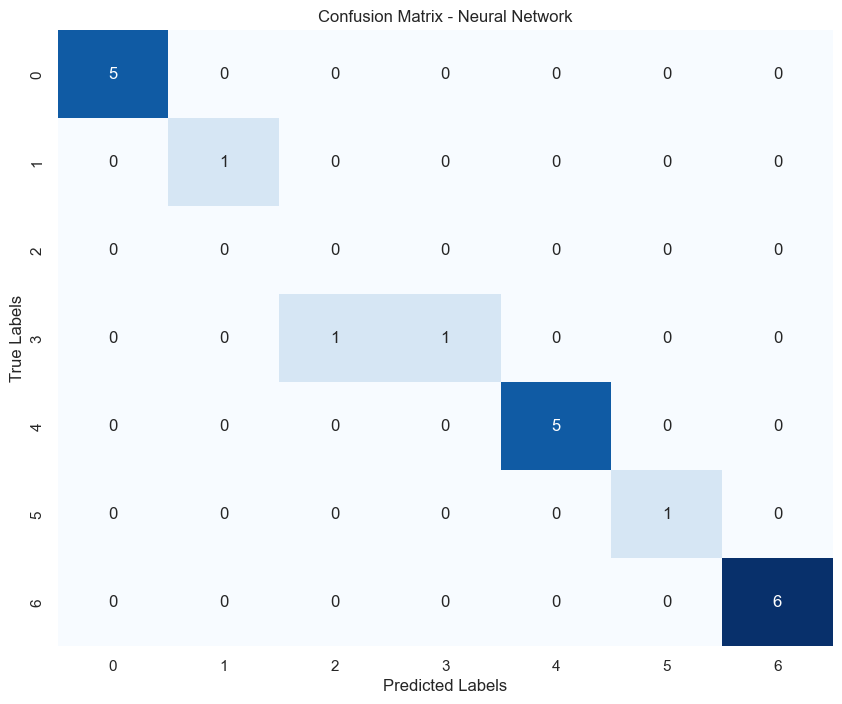

In [34]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
fertilizer_data =  pd.read_csv("dataset/Fertilizer.csv") 

# Preprocessing
X = fertilizer_data.drop(columns=['Fertilizer Name'])
y = fertilizer_data['Fertilizer Name']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)

# Training the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Neural Network Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Neural Network')
plt.show()


In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss
import tracemalloc
import time


# Load the dataset
df = pd.read_csv('dataset/Fertilizer.csv')

# Encode the target variable using LabelEncoder
encoder = LabelEncoder()
df['Fertilizer Name'] = encoder.fit_transform(df['Fertilizer Name'])

# Separate features and target variable after encoding
X = df[['Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Fertilizer Name']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name):
    tracemalloc.start()  # Start tracing the memory allocation
    
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Memory usage
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop tracing the memory allocation
    
    # Predictions and probabilities on test set
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    
    # Log Loss
    model_log_loss = log_loss(y_test, y_probs) if y_probs is not None else "Not Applicable"
    
    print(f"{model_name} Training Time: {training_time:.4f} seconds")
    print(f"{model_name} Memory Usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")
    print(f"{model_name} Log Loss: {model_log_loss}\n")
    
    # Detailed classification report
    print(classification_report(y_test, y_pred, labels=np.unique(y_train), target_names=encoder.classes_))

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
nn_model = MLPClassifier(random_state=42)

# Train and evaluate Random Forest Classifier
print("Random Forest Classifier:")
train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest Classifier')

# Train and evaluate Neural Network
print("\nNeural Network:")
train_and_evaluate_model(nn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')

Random Forest Classifier:
Random Forest Classifier Training Time: 0.8315 seconds
Random Forest Classifier Memory Usage: 0.1407 MB; Peak: 0.1685 MB
Random Forest Classifier Log Loss: 0.033158740442987604

                               precision    recall  f1-score   support

                          DAP       1.00      1.00      1.00         4
Fourteen-Thirty Five-Fourteen       1.00      1.00      1.00         3
Seventeen-Seventeen-Seventeen       1.00      1.00      1.00         1
    Ten-Twenty Six-Twenty Six       1.00      1.00      1.00         1
    Twenty Eight-Twenty Eight       1.00      1.00      1.00         3
                Twenty-Twenty       1.00      1.00      1.00         3
                         Urea       1.00      1.00      1.00         5

                     accuracy                           1.00        20
                    macro avg       1.00      1.00      1.00        20
                 weighted avg       1.00      1.00      1.00        20


Neural Netw

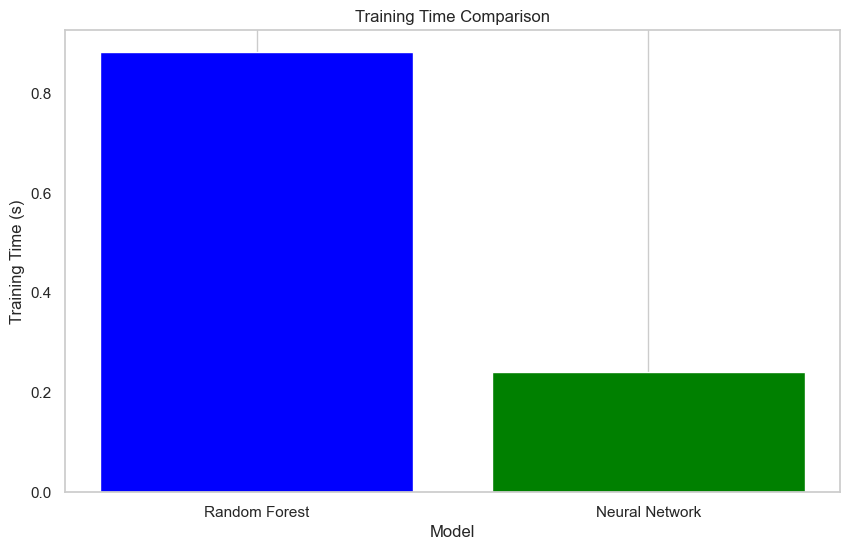

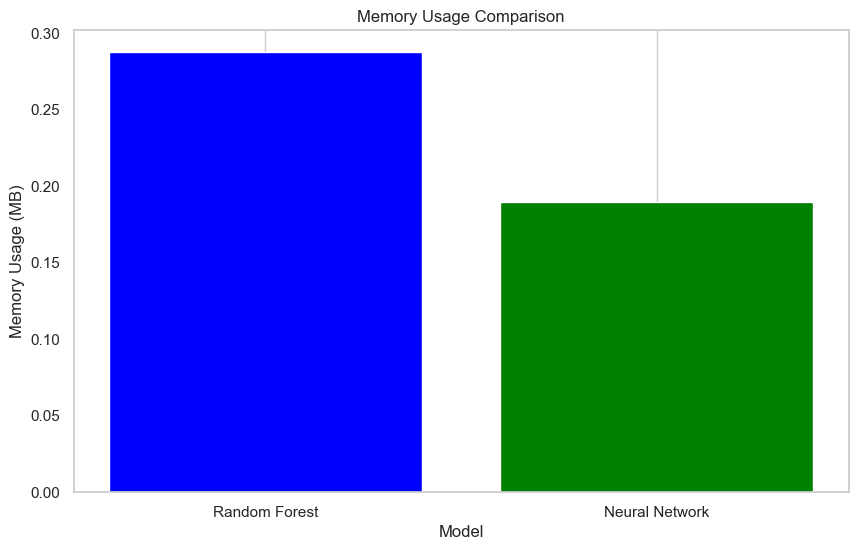

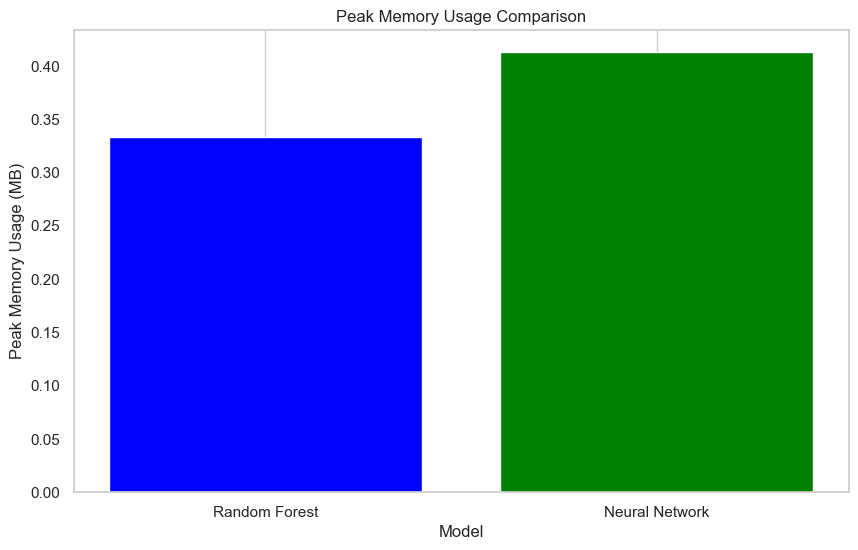

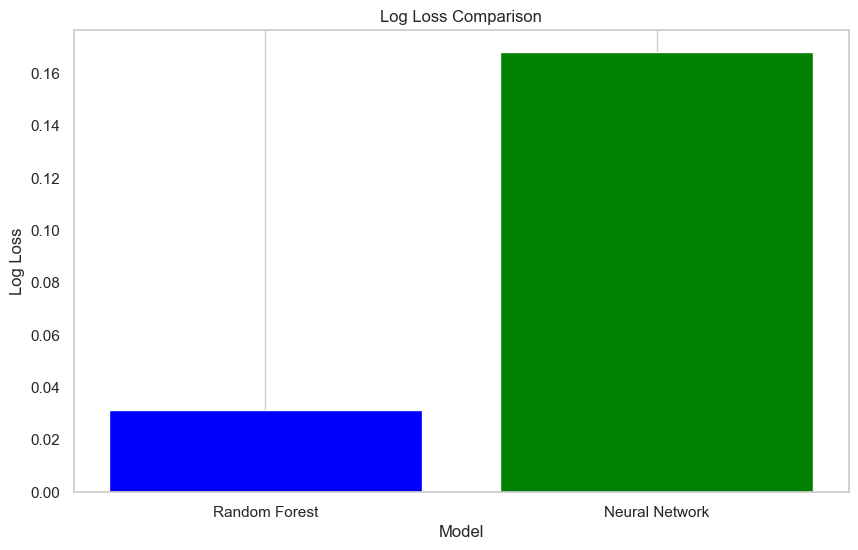

In [30]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'Model': ['Random Forest', 'Neural Network'],
    'Training Time (s)': [0.8821, 0.2411],
    'Memory Usage (MB)': [0.2875, 0.1895],
    'Peak Memory Usage (MB)': [0.3337, 0.4129],
    'Log Loss': [0.031587, 0.168100]
}

df = pd.DataFrame(data)

# Create a bar chart for training time
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Training Time (s)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
# plt.yscale('log')  # Logarithmic scale for y-axis is not necessary here
plt.grid(axis='y')
plt.show()

# Create a bar chart for memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for peak memory usage
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Peak Memory Usage (MB)'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Peak Memory Usage Comparison')
plt.grid(axis='y')
plt.show()

# Create a bar chart for log loss
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Log Loss'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.grid(axis='y')
plt.show()


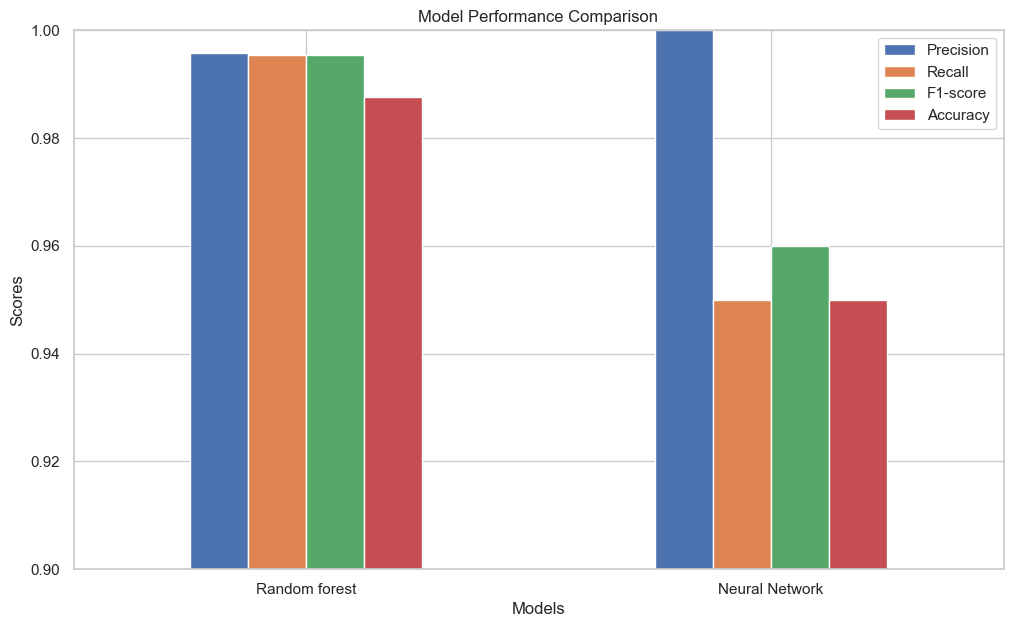

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Random forest', 'Neural Network']
precision = [0.9958, 1.0]
recall = [0.9955, 0.95]
f1_score = [0.9954, 0.96]
accuracy = [0.9876, 0.95]

# Creating DataFrame
df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'Accuracy': accuracy}, index=models)

# Plotting
ax = df.plot(kind='bar', figsize=(12, 7))
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
plt.xticks(rotation=0)
plt.grid(True)

# Adjusting y-axis scale to better visualize differences
ax.set_ylim(0.9, 1.0)  # Adjusted y-axis limits

plt.show()


## Export model to Pickle file

In [32]:
#import pickle
#pickle_out = open('random_forest_model.pkl', 'wb')
#pickle.dump(grid_rand,pickle_out)
#pickle_out.close()